<p align="center">
  <img src="data/TITANIC COVER.png" width="1200" height="500">
</p>

# Titanic Survival Prediction: A Comprehensive Exploration

# 1. Introduction

The sinking of the Titanic remains one of the most tragic events in maritime history, claiming the lives of many passengers in a heartbreaking manner. This project delves into the infamous Titanic dataset, available on Kaggle, to predict survival outcomes using various machine learning models. The dataset, derived from this historic catastrophe, not only provides a real-world context for analysis but also serves as a valuable resource for data science enthusiasts and students seeking a comprehensive guide.

**Project Overview**  
Motivated by the project's prominence within the data science community and the rich dataset derived from a well-documented historical event, this endeavor aims to create a detailed guideline for both personal use and as a resource for aspiring data scientists. The journey encompasses initial data exploration, meticulous data preprocessing, insightful exploratory data analysis, model building, feature selection, and hyperparameter tuning.  

**Outline of the Study**  
* Introduction
* Initial Data Exploration
* Data Preprocessing  
* Exploratory Data Analysis and Visualizations  
* Model Building, Evaluation and Feature Selection  
* Hyperparameter Tuning  

**Data Preprocessing and Feature Engineering**  
The data preprocessing phase involved not only combining train and test datasets but also addressing missing values and performing extensive feature engineering. Beyond extracting titles from names, a 'Family' feature was created, capturing the nuanced dynamics of passenger relationships. Despite concerted efforts on names, tickets, and cabins, only title extraction significantly contributed to the models. Additionally, binning age and fare variables proved pivotal, not only enhancing model performance but also mitigating issues of overfitting.

**Exploratory Data Analysis and Key Findings**  
The exploratory data analysis (EDA) extended beyond surface-level examination, employing nested pivots and nuanced questioning to extract deeper insights. Beyond the well-established impact of gender on survival rates, the analysis revealed surprising correlations, such as the lack of correlation between age and survival—a phenomenon elucidated by gender-based disparities. Further revelations included the substantial influence of passenger class, ticket fares, and the emergence of titles as critical factors. Notably, the exploration uncovered intricate patterns related to age, gender, and survival, highlighting the complexity of the dataset.

**Classification Models, Feature Selection, and Key Findings**  
The classification model phase embraced a diverse set, including Random Forest, Logistic Regression, and XGBoost. Rigorous evaluation of feature importance and coefficients resulted in the selection of six key features: Pclass, Binned Fare, Binned Age, Family, Gender, and Titles. Feature selection not only streamlined model performance but also provided a nuanced understanding of the predictive factors. Beyond accuracy scores, the models were scrutinized for their ability to generalize, with Random Forest emerging as the most robust classifier. Further exploration revealed that features like 'Embarked,' 'Is Alone,' and 'SibSp' added minimal value, and their removal consistently improved model performance across various algorithms.

**Challenges and Future Improvements**  
Challenges encountered included intricate feature extraction, potential overfitting, and the critical task of feature selection. Future improvements may involve delving deeper into feature engineering, especially on surnames, ticket numbers, and cabins. Additionally, the exploration of more sophisticated models, potentially including neural networks or complex layered approaches, could further enhance predictive accuracy and robustness.  This notebook and study, is not aimed to maximize the Kaggle scores, therefore a thorough study is conducted as in daily life. However, if you want to maximize the scores, you can simply use this study, play with the train-test split ratio, spend much more time on hyperparamtre tuning, feature selection and try different models for prediction, each time you can face some small improvements. In case of use thisd study, dont forget to kindly make a reference.

**Contact**  
For questions, collaborations, or further discussions, feel free to reach out on [Linkedin](https://www.linkedin.com/in/fatih-calik-469961237/), [Github](https://github.com/fatih-ml) or [Kaggle](https://www.kaggle.com/fatihkgg)

**Dataset**  
Also, you can reach the famous Kaggle titanic competition and original dataset on [this link](https://www.kaggle.com/c/titanic)

# 2. Initial Data Exploration

## Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
import pickle
from datetime import datetime
import time

import warnings
warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
start_time = time.time()


In [2]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier 
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score, plot_roc_curve
from sklearn.model_selection import learning_curve

In [3]:
df_train2 = pd.read_csv('data/train.csv')
df_test2 = pd.read_csv('data/test.csv')
df_train2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Prepare Datasets & First Observations

In [4]:
print(df_train2.shape)
print(df_test2.shape)

(891, 12)
(418, 11)


In [5]:
df = pd.concat([df_train2, df_test2], axis=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [7]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns
numerical_features = df.select_dtypes(include='number').columns

In [8]:
df[categorical_features].describe().T

,count,unique,top,freq
Name,1309,1307,"Connolly, Miss. Kate",2
Sex,1309,2,male,843
Ticket,1309,929,CA. 2343,11
Cabin,295,186,C23 C25 C27,6
Embarked,1307,3,S,914


In [9]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


## Missing Values

In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

# 3. Data Preprocessing

**I will create some new features, some of them for better visualization or exploratory data analysis, some of them is for better models, dont worry if i dont drop them initially, before models, i will prepare dataset for the model**

In [11]:
# we can easily decide to drop PassengerId, since it doesnt add value to our model
# Also ticket number also have 929 unique values, it will be very hard to gain inferences, though it can slightly represents family relations of duplicate tickets
df.drop(columns=['PassengerId', 'Ticket'], inplace=True)

In [12]:
# fill Embarked with the most requent observation
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [13]:
# fill Fare with Class median fare
df.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [14]:
df['Fare'].fillna(8.0, inplace=True)

## Names

__Name feature is of course too varying. We can extract the titles from here, we will use it to fill nan values in age variable, also some Special Titles may have high survival rates. Also, surnames can be extracted here to build a connection with other family members__  

__I run the models only with my new 'title column' and the results was shockingly good an average of 0.79 Accuracy without hyperparamtre tuning, While the age alone is around 0.63, fares 0.68__

In [15]:
title_mapping = {
    'Mr.': 'Mr.',
    'Mrs.': 'Mrs.',
    'Miss.': 'Miss',
    'Ms.': 'Miss',
    'Master.': 'Master.',
    'Mlle.': 'Miss',
    'Mme.': 'Miss',
    'Dr.': 'Special_title',
    'Sir': 'Special_title',
    'Col.': 'Special_title',
    'Capt.': 'Special_title',
    'Don.': 'Special_title',
    'Major.': 'Special_title',
    'Jonkheer.': 'Special_title',
    'Rev.': 'Special_title',
    'Countess.': 'Special_title',
    'Lady.': 'Special_title',
}

In [16]:
# Extract title from name
df['Title'] = df['Name'].apply(lambda name: next((title_mapping[title] for title in title_mapping if title in name), None))

# Drop Name
df.drop(columns= ['Name'], inplace=True)

# Print the value counts
df['Title'].value_counts()

Mr.              757
Miss             265
Mrs.             197
Master.           61
Special_title     28
Name: Title, dtype: int64

## Age

In [17]:
# Fill Nan valuess according to their Titles, which also represents their age group in a degree
median_age_titles = df.groupby('Title')['Age'].transform('median').round(0)

# Fill missing Age values with the calculated medians
df['Age'] = df['Age'].fillna(median_age_titles)

__I want to apply discretization to age feature. Lets try to decide by inspiring from kdeplots and general age categories from domain__

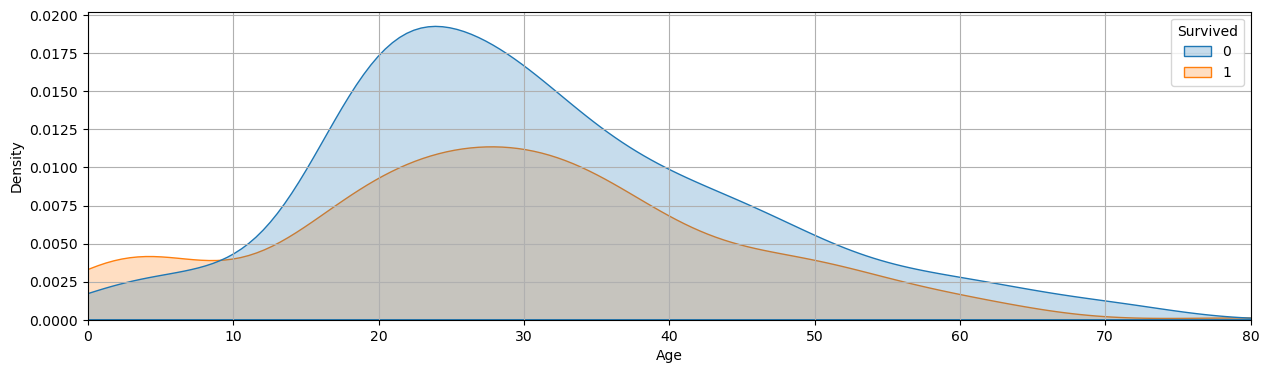

In [18]:
fig = plt.figure(figsize=(15,4))
sns.kdeplot(data=df_train2, x='Age', hue='Survived', common_norm=True, fill=True )
plt.xlim(0, 80)
plt.grid()
plt.show()

In [19]:
age_bins = [0, 12, 20, 30, 40, 50, 100]  
age_labels = ['Child', 'Teen', 'Young_Adult', 'Middle_Age', 'Senior_Adult', 'Old']

# Create the 'Age_Category' column using pd.cut
df['Age_Category'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Drop Age column
df.drop(columns=['Age'], inplace=True)

In [20]:
# Before data splitting test-train it is good to have numeric age as well
age_cat_order = ['Child', 'Teen', 'Young_Adult', 'Middle_Age', 'Senior_Adult', 'Old']
age_label_encoder = LabelEncoder()
age_label_encoder.classes_ = age_cat_order
df['Age_Cat_Label'] = age_label_encoder.transform(df['Age_Category'])
df['Age_Cat_Label'].value_counts()

2    571
3    259
4    136
1    134
5    110
0     99
Name: Age_Cat_Label, dtype: int64

**I runned the model with only age feature alone, binned and label encoded with bins, the performance is better in almost all models**

## Cabin No

<p align="center">
  <img src="data/titanic_plan.png" width="300" height="300">
</p>

We will try to extract first letters from Cabin No as Decks:
[click for detailed plan](data/titanic_plan.png)   ( [image source](https://www.scmp.com/infographics/article/1633333/infographic-titanic) )

In [21]:
df['Cabin'].fillna('No_Cabin', inplace=True)

In [22]:
# Fill missing values, by No_cabin value
def extract_cabins(cabin):
    if cabin == 'No_Cabin':
        deck = 'No_Cabin'
    else:    
        deck = cabin[0]
    return deck

df['Deck'] = df['Cabin'].apply(extract_cabins)

In [23]:
df['Deck'].value_counts()

No_Cabin    1014
C             94
B             65
D             46
E             41
A             22
F             21
G              5
T              1
Name: Deck, dtype: int64

In [24]:
qty_deck_class = pd.DataFrame(df.groupby(['Pclass', 'Deck'])['Fare'].count())
qty_deck_class

Fare
Pclass Deck          
1      A           22
       B           65
       C           94
       D           40
       E           34
       No_Cabin    67
       T            1
2      D            6
       E            4
       F           13
       No_Cabin   254
3      E            3
       F            8
       G            5
       No_Cabin   693

**It will be very misleading to continue those no cabin values according to other values such as Pclass and Fare**
**There is a very big number to be filled, altough we have the plan, it is not giving a full picture but just an estimation**
**Moreover it will be turning into a Pclass, so better to remove now**

In [25]:
df.drop(columns=['Cabin', 'Deck'], inplace=True)

## Family

**I will create two new columns:**  
- Sibsb: number of siblings or spouse traveling with   
- Parch: number of parents or childs traveling with  
- Family: number of family members travelling with
- Is_Alone: whether passenger is travelling alone or not

In [26]:
df['Family'] = df['Parch'] + df['SibSp'] + 1

In [27]:
df['Is_Alone'] = (df['Family'] == 1).astype(int)

## Check for Outliers

In [28]:
df.sample(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_Category,Age_Cat_Label,Family,Is_Alone
650,0.0,3,male,0,0,7.8958,S,Mr.,Young_Adult,2,1,1
656,0.0,3,male,0,0,7.8958,S,Mr.,Young_Adult,2,1,1
263,0.0,1,male,0,0,0.0000,S,Mr.,Senior_Adult,4,1,1


In [29]:
# there is no outliers issue with family
df['Family'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family, dtype: int64

### Fare

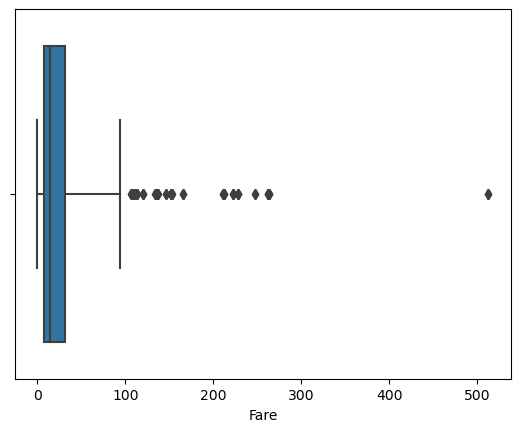

In [30]:
# Lets check Fare, it seems like we have a problem with outliers
sns.boxplot(df['Fare'], whis=3);

In [31]:
#lets try to observe outliers because i dont want to drop any observation unless neccessary
df[df['Fare']>250]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_Category,Age_Cat_Label,Family,Is_Alone
27,0.0,1,male,3,2,263.0000,S,Mr.,Teen,1,6,0
88,1.0,1,female,3,2,263.0000,S,Miss,Young_Adult,2,6,0
258,1.0,1,female,0,0,512.3292,C,Miss,Middle_Age,3,1,1
311,1.0,1,female,2,2,262.3750,C,Miss,Teen,1,5,0
341,1.0,1,female,3,2,263.0000,S,Miss,Young_Adult,2,6,0
438,0.0,1,male,1,4,263.0000,S,Mr.,Old,5,6,0
679,1.0,1,male,0,1,512.3292,C,Mr.,Middle_Age,3,2,0
737,1.0,1,male,0,0,512.3292,C,Mr.,Middle_Age,3,1,1
742,1.0,1,female,2,2,262.3750,C,Miss,Young_Adult,2,5,0
24,NaN,1,female,1,3,262.3750,C,Mrs.,Senior_Adult,4,5,0


In [32]:
# and there are some 0 in tickets

print(len(df[df['Fare']<1]), ' Passengers have 0 ticket fare' '\n')
df[df['Fare']<1]

17  Passengers have 0 ticket fare



,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_Category,Age_Cat_Label,Family,Is_Alone
179,0.0,3,male,0,0,0.0,S,Mr.,Middle_Age,3,1,1
263,0.0,1,male,0,0,0.0,S,Mr.,Senior_Adult,4,1,1
271,1.0,3,male,0,0,0.0,S,Mr.,Young_Adult,2,1,1
277,0.0,2,male,0,0,0.0,S,Mr.,Young_Adult,2,1,1
302,0.0,3,male,0,0,0.0,S,Mr.,Teen,1,1,1
413,0.0,2,male,0,0,0.0,S,Mr.,Young_Adult,2,1,1
466,0.0,2,male,0,0,0.0,S,Mr.,Young_Adult,2,1,1
481,0.0,2,male,0,0,0.0,S,Mr.,Young_Adult,2,1,1
597,0.0,3,male,0,0,0.0,S,Mr.,Senior_Adult,4,1,1
633,0.0,1,male,0,0,0.0,S,Mr.,Young_Adult,2,1,1


In [33]:
# As its seen 4 observations paid much higher than nearest max ticket prices for similar rooms.
# So i will change these ticket prices just around %10 higher than the closes max ticket price=280.0
df.loc[df['Fare'] > 300, 'Fare'] = 280.0

In [34]:
# Also there are 17 zero ticket prices - I will assign them to the minimum ticket prices of each class
min_tick_price_pclass = df[df['Fare']>5].groupby('Pclass')['Fare'].min()
min_tick_price_pclass

Pclass
1    25.5875
2     9.6875
3     6.2375
Name: Fare, dtype: float64

In [35]:
for i in [1, 2, 3]:
    condition = (df['Pclass'] == i) & (df['Fare'] == 0)
    df.loc[condition, 'Fare'] = min_tick_price_pclass[i]

In [36]:
# Fine all of them cleaned
df[  (df['Fare']<1) |  (df['Fare']>300) ]

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_Category,Age_Cat_Label,Family,Is_Alone


**Better to create Fare Bins in our dataset, also add to the model, may help dealing overfitting, in case of overfitting**

In [37]:
df['Fare_Binned'] = pd.qcut(df['Fare'], q=5, labels=False, precision=3)
df['Fare_Binned'] = df['Fare_Binned']+1
df['Fare_Binned'].value_counts()

3    263
4    263
1    262
2    262
5    259
Name: Fare_Binned, dtype: int64

In [38]:
df.groupby('Fare_Binned')['Fare'].median()

Fare_Binned
1     7.7271
2     8.0500
3    14.5000
4    27.4458
5    78.2667
Name: Fare, dtype: float64

## Data splitting

**Since we almost finished preprocessing, now we can divide the data again, and continue for more insights with EDA and visualizations**

In [39]:
idx_split = len(df_train2)
print(f"The last INCLUDED index of df_train will be {idx_split-1}")

df_train = df.iloc[:idx_split]
df_test = df.iloc[idx_split:].drop(columns=['Survived'])

The last INCLUDED index of df_train will be 890


In [40]:
df_train.tail(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_Category,Age_Cat_Label,Family,Is_Alone,Fare_Binned
889,1.0,1,male,0,0,30.00,C,Mr.,Young_Adult,2,1,1,4
890,0.0,3,male,0,0,7.75,Q,Mr.,Middle_Age,3,1,1,1


In [41]:
df_test.head(2)

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_Category,Age_Cat_Label,Family,Is_Alone,Fare_Binned
0,3,male,0,0,7.8292,Q,Mr.,Middle_Age,3,1,1,1
1,3,female,1,0,7.0000,S,Mrs.,Senior_Adult,4,2,0,1


In [42]:
# Lets check whether the splitting and preprocessing is correct
print(f"Train datasets are equal length = {len(df_train2) == len(df_train)}")
print(f"Test datasets are equal length = {len(df_test2) == len(df_test)}")

Train datasets are equal length = True
Test datasets are equal length = True


# 4. Exploratory data analysis and visualizations

## Additional Preparation to EDA

In [43]:
categorical_features = df_train.select_dtypes(include=['object', 'category']).columns
numerical_features = df_train.select_dtypes(include='number').columns

print(categorical_features)
print(numerical_features)

Index(['Sex', 'Embarked', 'Title', 'Age_Category'], dtype='object')
Index(['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Age_Cat_Label',
       'Family', 'Is_Alone', 'Fare_Binned'],
      dtype='object')


**I will label encode 3 categorical variables for better Exploratory data Analysis especially correlations**

In [44]:
label_encoder_eda = LabelEncoder()
df_encoded_eda = df_train[['Sex', 'Embarked', 'Title']].apply(label_encoder_eda.fit_transform)
df_corr_labeled = pd.concat([df_train, df_encoded_eda], axis=1)
df_corr_labeled.sample(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_Category,Age_Cat_Label,Family,Is_Alone,Fare_Binned,Sex,Embarked,Title
51,0.0,3,male,0,0,7.8000,S,Mr.,Young_Adult,2,1,1,1,1,2,2
308,0.0,2,male,1,0,24.0000,C,Mr.,Middle_Age,3,2,0,4,1,0,2
28,1.0,3,female,0,0,7.8792,Q,Miss,Young_Adult,2,1,1,2,0,1,1


## Frequencies & Distributions

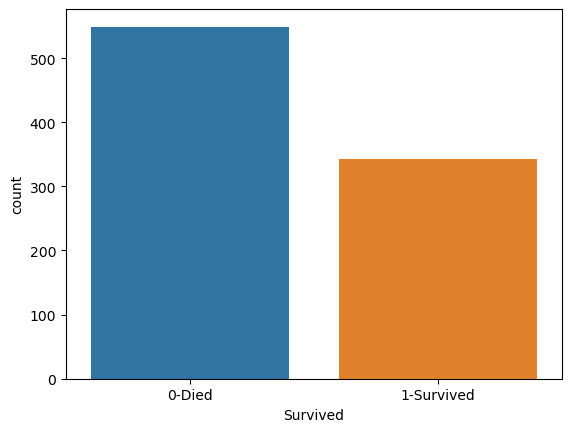

In [45]:
survived_map = {0: '0-Died', 1: '1-Survived'}
sns.countplot(df_train['Survived'].map(survived_map));

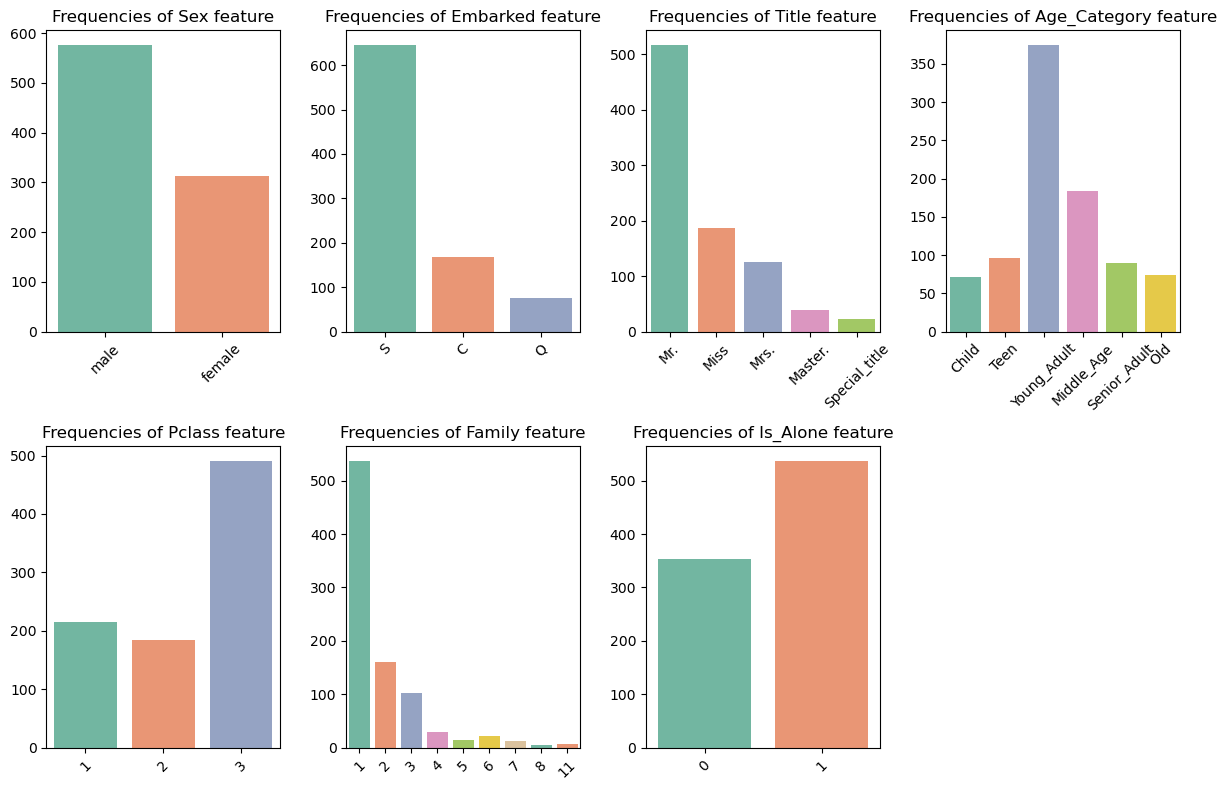

In [46]:
countplot_columns = list(categorical_features)
countplot_columns.extend(['Pclass', 'Family', 'Is_Alone' ])
plot_qty = len(countplot_columns)

colors = sns.color_palette('Set2', len(countplot_columns))
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

for i, ax in enumerate(axes.flatten()):
    if i < plot_qty:  # Only plot for the valid subplots
        col = countplot_columns[i]
        val_cnt = df_train[col].value_counts()
        sns.barplot(x=val_cnt.index, y=val_cnt.values, ax=ax, palette=colors)
        ax.set_title(f"Frequencies of {col} feature")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    else:
        ax.axis('off')  # Hide the unused subplot areas

plt.tight_layout()
plt.show()

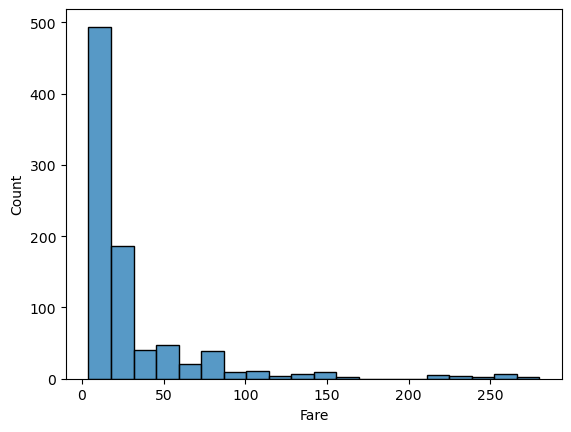

In [47]:
sns.histplot(df_train['Fare'], bins=20);

## Correlations

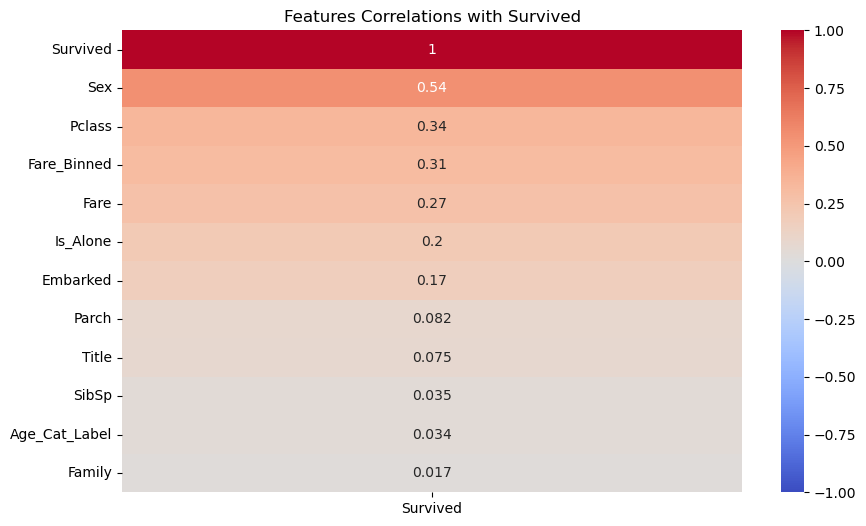

In [48]:
target_column = 'Survived'
corr_matrix = df_corr_labeled.corr()
corr_with_target = corr_matrix[target_column].apply(np.abs).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title(f'Features Correlations with {target_column}')
plt.show()

**Lest underline some inferences:**  
* It is shocking for me to have such an almost ZERO correlation between age and survival, but this is mainly because of genders. Since males from all ages apart from childs are having high unsirvival rate, while womens contrary. So this mutual contradiction erases the correlation, i think  
* not surprisingly, gender is the most prominent factor with 0.54 correlation coefficient with survival rate  
* Pclass is comind the second, which means that some decks or cabins had better direction to the rescue boats, or some people might had beed discriminated against others  
* Thicket fares is the third factor, similarly to Pclass,  
* And lastly we can say a very light correlation lies between travelling alone and survival rate 

**Multicollinearity?**

In [49]:
def color_red(val):
    if val > 0.85 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'black'
    return f'color: {color}'

In [50]:
df_corr_labeled.corr().style.applymap(color_red)

,Survived,Pclass,SibSp,Parch,Fare,Age_Cat_Label,Family,Is_Alone,Fare_Binned,Sex,Embarked,Title
Survived,1.000000,-0.338481,-0.035322,0.081629,0.267456,-0.033913,0.016639,-0.203367,0.305532,-0.543351,-0.167675,-0.074812
Pclass,-0.338481,1.000000,0.083081,0.018443,-0.605384,-0.348179,0.065997,0.135207,-0.735838,0.131900,0.162098,-0.176783
SibSp,-0.035322,0.083081,1.000000,0.414838,0.188532,-0.256955,0.890712,-0.584471,0.351858,-0.114631,0.068230,-0.208541
Parch,0.081629,0.018443,0.414838,1.000000,0.245765,-0.181809,0.783111,-0.583398,0.340103,-0.245489,0.039798,-0.116282
Fare,0.267456,-0.605384,0.188532,0.245765,1.000000,0.111554,0.251636,-0.308787,0.658737,-0.205208,-0.218803,-0.010018
Age_Cat_Label,-0.033913,-0.348179,-0.256955,-0.181809,0.111554,1.000000,-0.266449,0.158531,0.133666,0.040262,-0.018424,0.511942
Family,0.016639,0.065997,0.890712,0.783111,0.251636,-0.266449,1.000000,-0.690922,0.410392,-0.200988,0.066516,-0.200623
Is_Alone,-0.203367,0.135207,-0.584471,-0.583398,-0.308787,0.158531,-0.690922,1.000000,-0.508914,0.303646,0.063532,0.015303
Fare_Binned,0.305532,-0.735838,0.351858,0.340103,0.658737,0.133666,0.410392,-0.508914,1.000000,-0.230423,-0.099185,0.053390
Sex,-0.543351,0.131900,-0.114631,-0.245489,-0.205208,0.040262,-0.200988,0.303646,-0.230423,1.000000,0.108262,0.064185


**As clearly expected, SibSp-Parch-Family, may have a multicollinearity since they are linked together, However it is on the edge, so i decide to continue as like this, also i will try to run the models with dropping**

## Inferences and Questions?

### Gender and Survival Rate

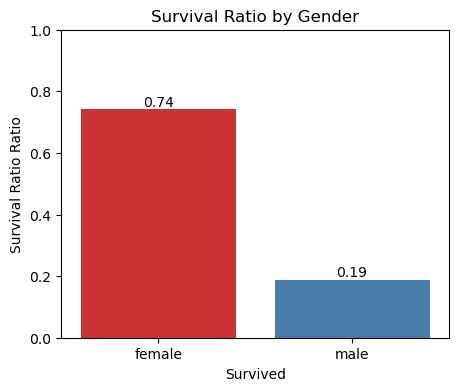

In [51]:
survival_ratio_gender = df_train.groupby('Sex')['Survived'].mean()

# Visualize the survival ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=survival_ratio_gender.index, y=survival_ratio_gender.values, palette='Set1')
plt.title('Survival Ratio by Gender')
plt.xlabel('Survived')
plt.ylabel('Survival Ratio Ratio')
plt.ylim(0,1)

for index, value in enumerate(survival_ratio_gender):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

**Females seem to have almost 4 times higher possibility to survive than males**

### Survival Rates by Class

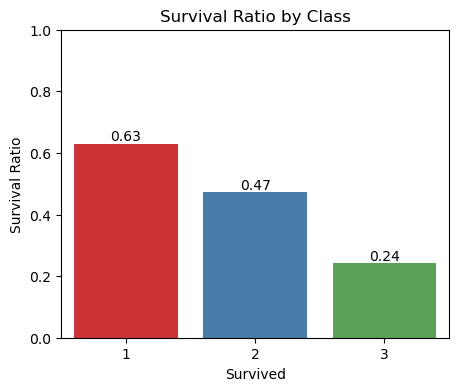

In [52]:
survival_ratio_pclass = df_train.groupby('Pclass')['Survived'].mean()

# Visualize the survival ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=survival_ratio_pclass.index, y=survival_ratio_pclass.values, palette='Set1')
plt.title('Survival Ratio by Class')
plt.xlabel('Survived')
plt.ylabel('Survival Ratio')
plt.ylim(0,1)

for index, value in enumerate(survival_ratio_pclass):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

**As expected, higher class has a higher survival rate. 1st class travellers are 3 times high possible to survive than 3rd class passengers**

### Travel Alone vs. Family Travellers

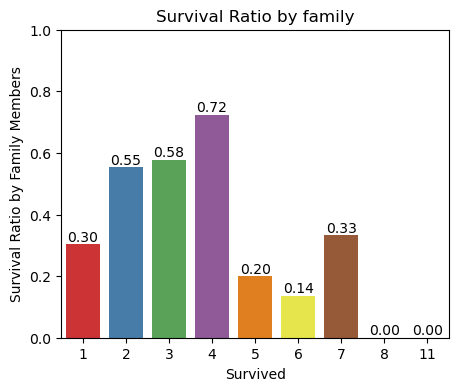

In [53]:
survival_ratio_family = df_train.groupby('Family')['Survived'].mean()

# Visualize the survival ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=survival_ratio_family.index, y=survival_ratio_family.values, palette='Set1')
plt.title('Survival Ratio by family')
plt.xlabel('Survived')
plt.ylabel('Survival Ratio by Family Members')
plt.ylim(0,1)

for index, value in enumerate(survival_ratio_family):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

### Survival and Age

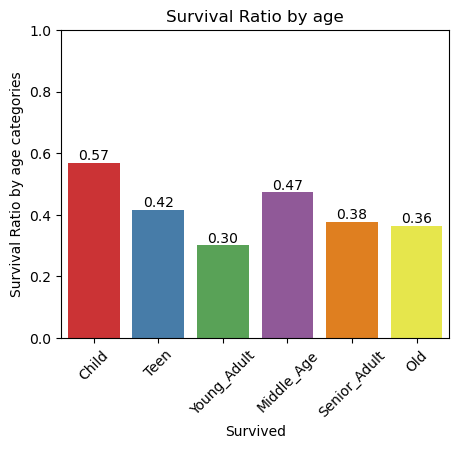

In [54]:
survival_ratio_age = df_train.groupby('Age_Category')['Survived'].mean()

# Visualize the survival ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=survival_ratio_age.index, y=survival_ratio_age.values, palette='Set1')
plt.title('Survival Ratio by age')
plt.xticks(rotation=45)
plt.xlabel('Survived')
plt.ylabel('Survival Ratio by age categories')
plt.ylim(0,1)

for index, value in enumerate(survival_ratio_age):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

### Ticket Fares and Survival

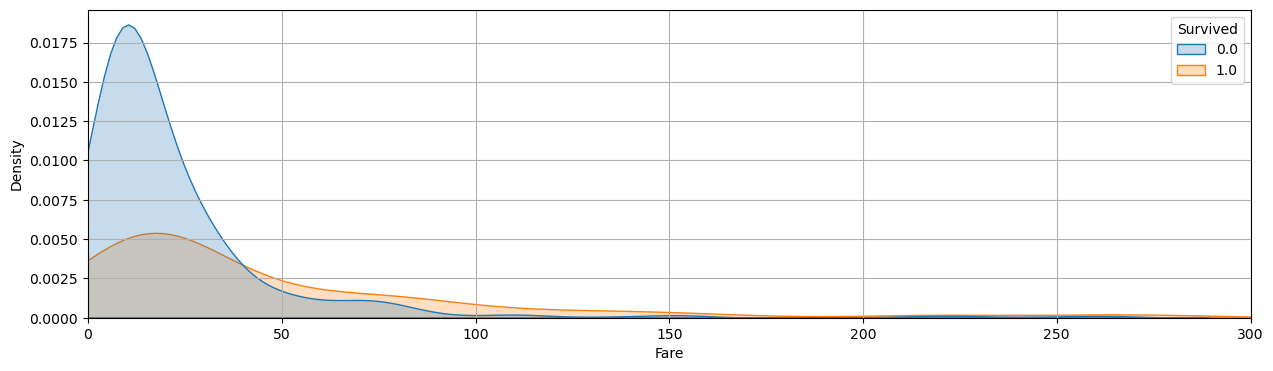

In [55]:
fig = plt.figure(figsize=(15,4))
sns.kdeplot(data=df_train, x='Fare', hue='Survived', common_norm=True, fill=True )  
plt.xlim(0, 300)
plt.grid()
plt.show()

**After 40 dollars, survival possibility surpass dying possibility**

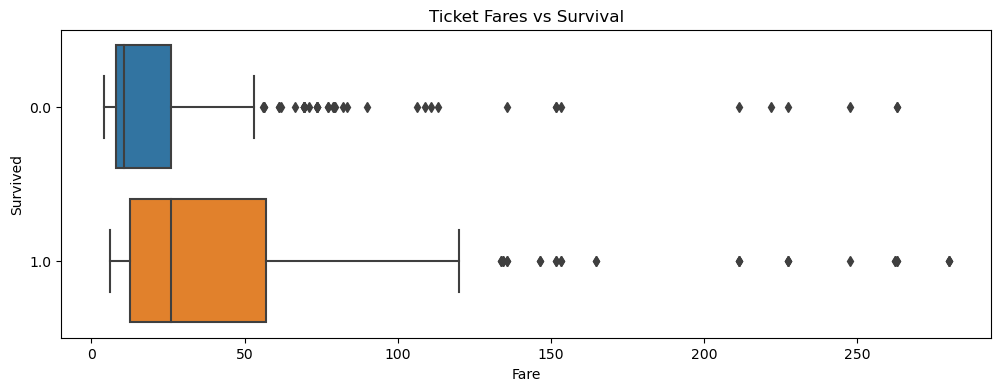

In [56]:
fig = plt.figure(figsize=(12,4))
sns.boxplot(data=df_train, x='Fare', y='Survived', orient='h')
plt.title('Ticket Fares vs Survival')
plt.show()

- **75% of the passengers who died, has a ticket price of 25 or less**  
- **On the other hand, half of the passengers who survived, paid more than this 25 amount**  
- **Its obvious that as the fare increase, survival rate increa as well**

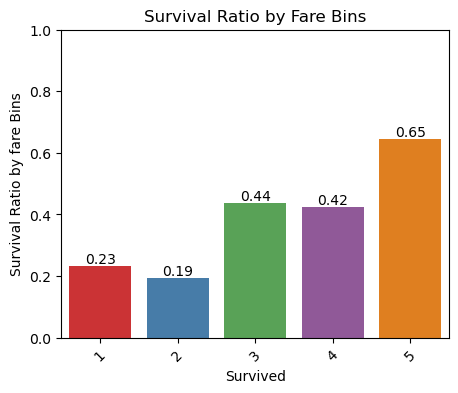

In [57]:
survival_ratio_fare_bins = df_train.groupby('Fare_Binned')['Survived'].mean()

# Visualize the survival ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=survival_ratio_fare_bins.index, y=survival_ratio_fare_bins.values, palette='Set1')
plt.title('Survival Ratio by Fare Bins')
plt.xticks(rotation=45)
plt.xlabel('Survived')
plt.ylabel('Survival Ratio by fare Bins')
plt.ylim(0,1)

for index, value in enumerate(survival_ratio_fare_bins):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

### Titles and Survivals

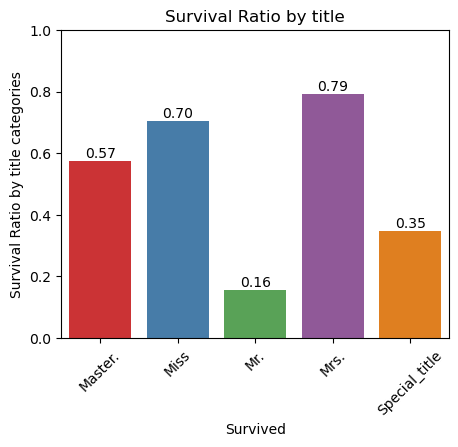

In [58]:
survival_ratio_title = df_train.groupby('Title')['Survived'].mean()

# Visualize the survival ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=survival_ratio_title.index, y=survival_ratio_title.values, palette='Set1')
plt.title('Survival Ratio by title')
plt.xticks(rotation=45)
plt.xlabel('Survived')
plt.ylabel('Survival Ratio by title categories')
plt.ylim(0,1)

for index, value in enumerate(survival_ratio_title):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

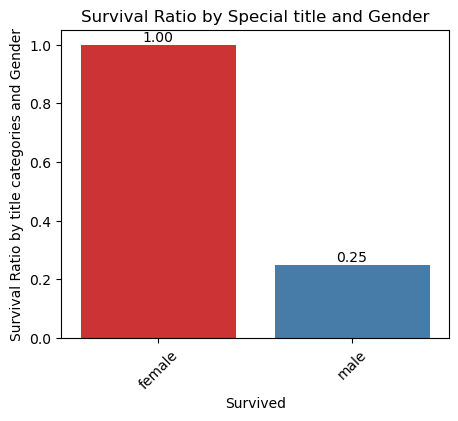

In [59]:
survival_ratio_special_title = df_train[df_train['Title']=='Special_title'].groupby('Sex')['Survived'].mean()

# Visualize the survival ratio with labels
plt.figure(figsize=(5, 4))
sns.barplot(x=survival_ratio_special_title.index, y=survival_ratio_special_title.values, palette='Set1')
plt.title('Survival Ratio by Special title and Gender')
plt.xticks(rotation=45)
plt.xlabel('Survived')
plt.ylabel('Survival Ratio by title categories and Gender')


for index, value in enumerate(survival_ratio_special_title):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
    
plt.show()

### Genders, Age and Survival

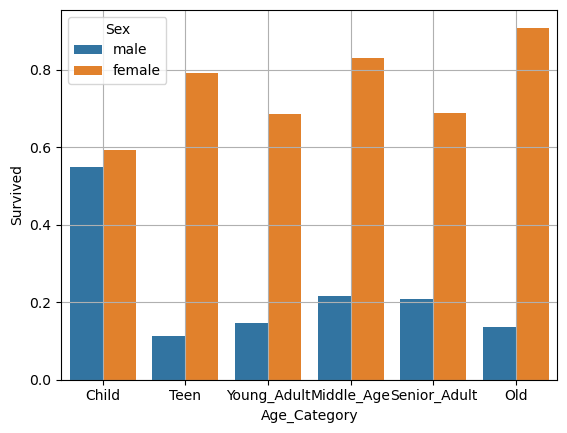

In [60]:
survival_ratio_gender_pclass = df_train.groupby(['Sex', 'Age_Category'])['Survived'].mean()

sns.barplot(data=df_train, x='Age_Category', y='Survived', hue='Sex', ci=None)
plt.grid()
plt.show()

* Child survival rates are almost identical no matter the genders  
* All other age groups: Females have far higher survival rates
* Males having special titles such as Colonel, Sir etc have almost 70% higher survival rates. (Normally its around %17 for a second and first class travelling male but its %25 for special titles)

### Gender, Classes and Survival

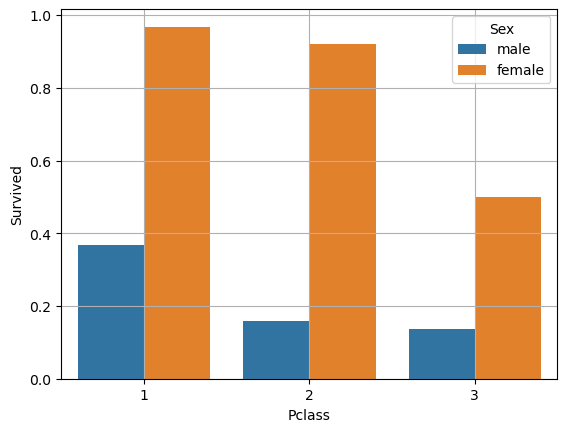

In [61]:
survival_ratio_gender_pclass = df_train.groupby(['Sex', 'Pclass'])['Survived'].mean()

sns.barplot(data=df_train, x='Pclass', y='Survived', hue='Sex', ci=None)
plt.grid()
plt.show()

**Female passengers traveling first and Second class have a survival rate of ove 90%**  
**whereas Males on second and Third Class is around 16%**

# 5. Model Building

## Train | Test Split

In [62]:
df_train.sample()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Title,Age_Category,Age_Cat_Label,Family,Is_Alone,Fare_Binned
665,0.0,2,male,2,0,73.5,S,Mr.,Middle_Age,3,3,0,5


In [63]:
# These features was staying for better visualization and EDA
df_train.drop(columns=['Age_Category', 'Fare', 'Parch'], inplace=True)
df_test.drop(columns=['Age_Category', 'Fare', 'Parch'], inplace=True)

In [64]:
df_train.sample(1)

,Survived,Pclass,Sex,SibSp,Embarked,Title,Age_Cat_Label,Family,Is_Alone,Fare_Binned
164,0.0,3,male,4,S,Master.,0,6,0,4


In [65]:
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']
X_validation = df_test.copy()

print(X.shape)
print(y.shape)
print(X_validation.shape)

(891, 9)
(891,)
(418, 9)


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Creating the pipelines

In [67]:
algorithms_scaled_data = [
    LogisticRegression(),
    SVC(random_state=42),
    KNeighborsClassifier()
]

algorithms_unscaled_data = [
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    XGBClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42)
]

algorithms = algorithms_scaled_data + algorithms_unscaled_data

In [68]:
pipelines = {}
num_features = X.select_dtypes(include=['number']).columns
cat_features = X.select_dtypes(include=['object', 'category']).columns

for algorithm in algorithms:
    
    # extract algorithm name as a string
    algorithm_name = algorithm.__class__.__name__
    
    # Create a column transformer for handling categorical and numerical features separately 
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_features), 
            ('cat', OneHotEncoder(drop='first', handle_unknown="ignore"), cat_features) 
        ]
    )
    
    # make pipelines for algorithms need scaling and onehotencoding (defined in preprocessor)
    if algorithm in algorithms_scaled_data:
        pipeline = Pipeline(steps = [
                ('preprocessor', preprocessor),
                (algorithm_name, algorithm)
            ])

    # make pipelines for tree based algorithms (no need for scaling and onehot encoding, but only ordinalencoding)
    else:
        pipeline = Pipeline(steps=[
                ("ordinalencoder", OrdinalEncoder()),
                (algorithm_name, algorithm)
            ])
    
    # REUSABLE models
    # fill the dictionary with algo names and their corresponding pipelines for using later
    pipelines[algorithm_name] = pipeline

# For Example
pipelines['LogisticRegression']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Pclass', 'SibSp', 'Age_Cat_Label', 'Family', 'Is_Alone',
       'Fare_Binned'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index(['Sex', 'Embarked', 'Title'], dtype='object'))])),
                ('LogisticRegression', LogisticRegression())])

In [69]:
# Another example
pipelines['RandomForestClassifier']

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('RandomForestClassifier',
                 RandomForestClassifier(random_state=42))])

## Model Evaluation

In [70]:
model_scores = pd.DataFrame(columns=['Algorithm', 'Train_Accuracy', 'Test_Accuracy', 'Cross_Validate_Accuracy'])
algorithm_score = {}

# iterate through our stored pipelines in pipeline dictionary
for model_name, pipeline in pipelines.items():
    
    # fit the pipelines
    pipeline.fit(X_train, y_train)

    # make predictions
    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)
    
    # calculate the scores
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    cv_score = cross_validate(pipeline, X_train, y_train, scoring='accuracy')['test_score'].mean()  
    
    # fill the scores dictionary with scores
    algorithm_score['Algorithm'] = model_name
    algorithm_score['Train_Accuracy'] = accuracy_train
    algorithm_score['Test_Accuracy'] = accuracy_test
    algorithm_score['Cross_Validate_Accuracy'] = cv_score
    
    # convert scores dictionary to dataframe
    model_scores = model_scores.append(algorithm_score, ignore_index=True)
    model_scores = model_scores.sort_values(by='Cross_Validate_Accuracy', ascending=False)
    
model_scores

,Algorithm,Train_Accuracy,Test_Accuracy,Cross_Validate_Accuracy
0,SVC,0.844101,0.821229,0.832808
6,GradientBoostingClassifier,0.875000,0.821229,0.827194
1,XGBClassifier,0.903090,0.832402,0.824397
2,KNeighborsClassifier,0.859551,0.843575,0.823028
3,LogisticRegression,0.834270,0.815642,0.822978
4,RandomForestClassifier,0.904494,0.843575,0.808953
5,DecisionTreeClassifier,0.904494,0.821229,0.803349


## Learning curve

In [71]:
def plot_learning_curve(estimator, X, y, title, ylim=None, cv=5, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters:
    - estimator: The machine learning model (classifier or regressor)
    - X: The feature matrix
    - y: The target vector
    - title: Title of the plot
    - ylim: Tuple (min, max) to define the y-axis limits
    - cv: Cross-validation iterator or an integer (number of splits)
    - n_jobs: Number of CPU cores to use for parallel computation (set to -1 to use all available cores)
    - train_sizes: Relative or absolute numbers of training examples that will be used to generate the learning curve
    """
    plt.figure(figsize=(12, 4))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    # Add text annotation for cross-validation score
    cv_score_text = f'CV Score: {test_scores_mean[-1]:.3f}\n(+/- {test_scores_std[-1]:.3f})'
    plt.annotate(cv_score_text, xy=(train_sizes[-1], test_scores_mean[-1]),
                 xytext=(train_sizes[-1] + 30, test_scores_mean[-1] - 0.02),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 fontsize=9, color='black')

    
    plt.legend(loc="best")
    return plt

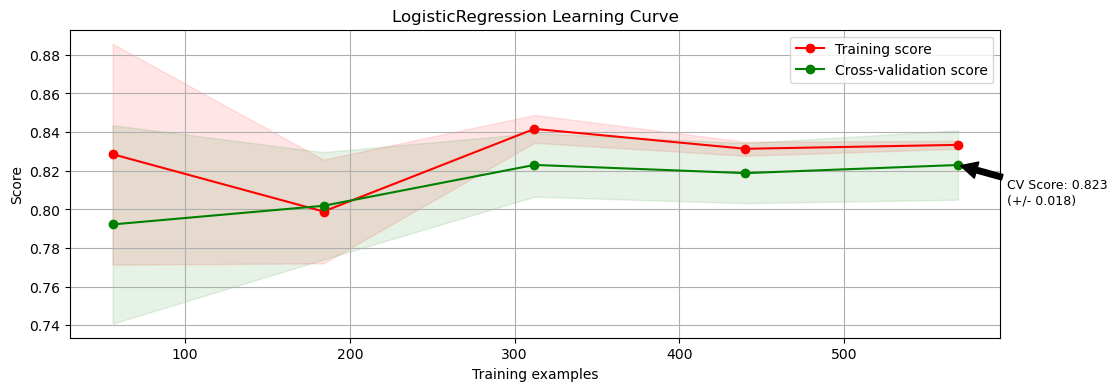

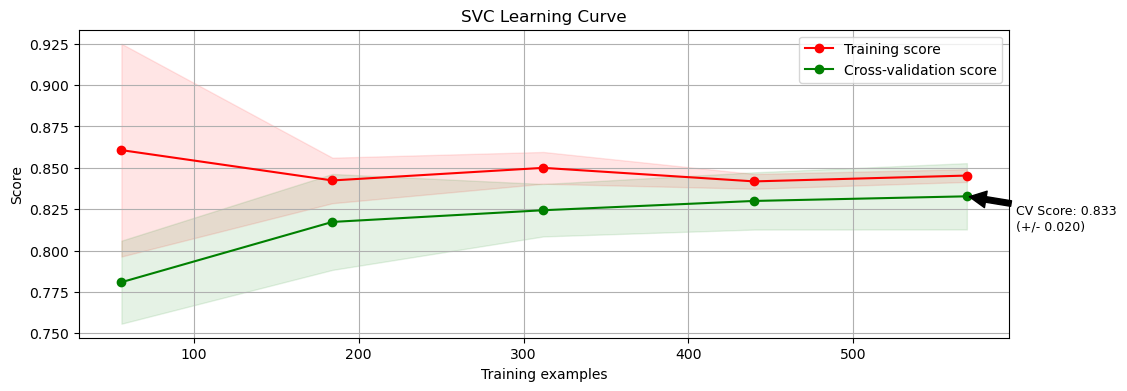

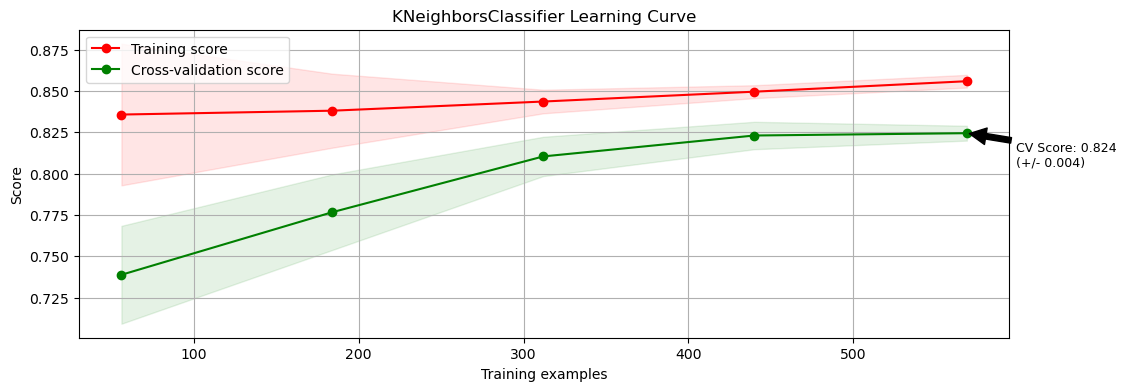

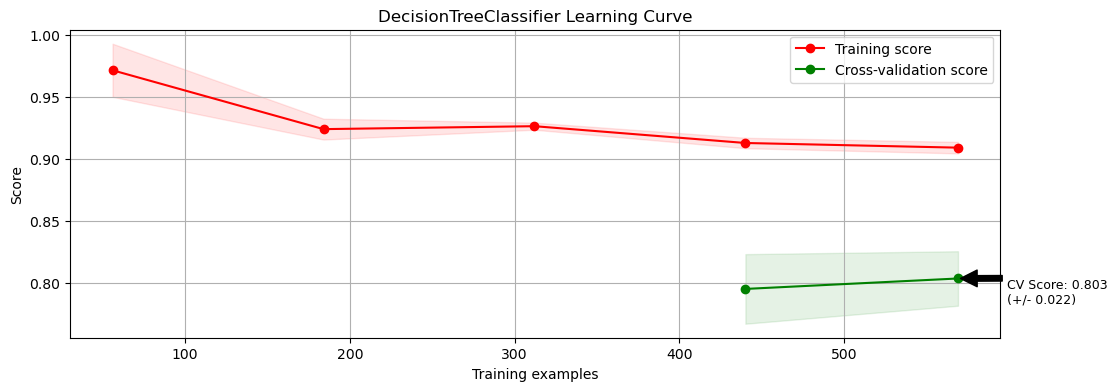

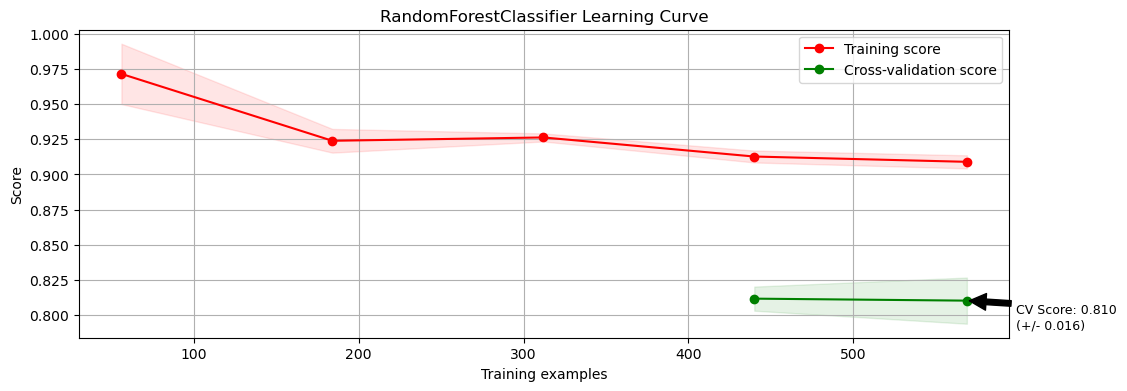

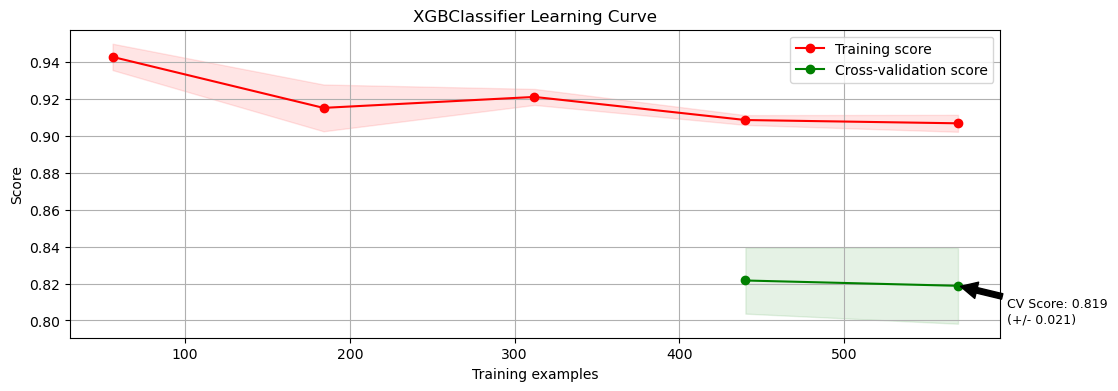

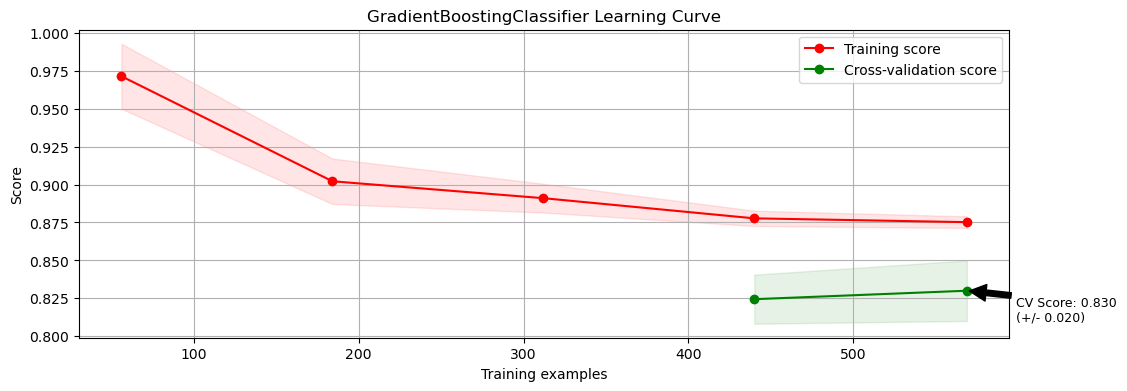

In [72]:
# Plot learning curves to see cross validation scores and possible overfitting issues

for model_name, pipeline in pipelines.items():
    plot_learning_curve(pipeline, X_train, y_train, title=f"{model_name} Learning Curve", cv=5)
plt.show()

## Feature Importances

**We know that feature importances are needed to be worked at tree based models**

In [73]:
# iterate through our stored pipelines in pipeline dictionary and find models have Feature importances attribute (tree based models)
feature_importance_df = pd.DataFrame(index=X.columns)
for model_name, pipeline in pipelines.items():
    if hasattr(pipeline.named_steps[model_name], 'feature_importances_'):
        feature_importances = pipeline.named_steps[model_name].feature_importances_
    
        feature_importance_df[model_name] = np.abs(feature_importances)

#Define a function to highlight the top 5 absolute values in each column
def highlight_top_5_absolute(s):
    top_5_indices = np.abs(s).nlargest(5).index
    is_top_5 = s.index.isin(top_5_indices)
    return ['background-color: lightblue' if v else '' for v in is_top_5]

# Apply the style to the DataFrame
styled_df = feature_importance_df.style.apply(highlight_top_5_absolute)

# Display the styled DataFrame
styled_df

,DecisionTreeClassifier,RandomForestClassifier,XGBClassifier,GradientBoostingClassifier
Pclass,0.153340,0.119625,0.132577,0.189282
Sex,0.410229,0.283938,0.644516,0.523494
SibSp,0.092072,0.057397,0.065848,0.067953
Embarked,0.044075,0.059580,0.026227,0.026787
Title,0.056050,0.136832,0.046414,0.061327
Age_Cat_Label,0.107166,0.125643,0.021478,0.021799
Family,0.051354,0.085305,0.029133,0.050596
Is_Alone,0.016141,0.014580,0.000000,0.001430
Fare_Binned,0.069573,0.117100,0.033809,0.057331


**Can we say that we can EXCLUDE:**  
- Embarked  
- Is Alone
- Family  

**Lets Try**

## ReRun the Models

In [74]:
df_train.sample()

,Survived,Pclass,Sex,SibSp,Embarked,Title,Age_Cat_Label,Family,Is_Alone,Fare_Binned
187,1.0,1,male,0,S,Mr.,4,1,1,4


In [75]:
# firstly drop variables, after feature selection
# df_rerun_train = df_train.drop(columns=['Is_Alone', 'Embarked'])
# df_rerun_test = df_test.drop(columns=['Is_Alone', 'Embarked'])

df_rerun_train = df_train.drop(columns=['Is_Alone'])
df_rerun_test = df_test.drop(columns=['Is_Alone'])

categorical_features = df_rerun_train.select_dtypes(include=['object', 'category']).columns

o_encoder = OrdinalEncoder()
df_rerun_train[categorical_features] = o_encoder.fit_transform(df_rerun_train[categorical_features])
df_rerun_test[categorical_features]  = o_encoder.fit_transform(df_rerun_test[categorical_features])

X = df_rerun_train.drop(columns=['Survived'])
y = df_rerun_train['Survived']
X_validation = df_rerun_test.copy()

print(X.shape)
print(y.shape)
print(X_validation.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(891, 8)
(891,)
(418, 8)


In [76]:
pipelines = {}
num_features = X_train.select_dtypes(include=['number']).columns
cat_features = X_train.select_dtypes(include=['object', 'category']).columns

for algorithm in algorithms:
    
    # extract algorithm name as a string
    algorithm_name = algorithm.__class__.__name__
    
    # Create a column transformer for handling categorical and numerical features separately 
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_features), 
            ('cat', OneHotEncoder(drop='first', handle_unknown="ignore"), cat_features) 
        ]
    )
    
    # make pipelines for algorithms need scaling and onehotencoding (defined in preprocessor)
    if algorithm in algorithms_scaled_data:
        pipeline = Pipeline(steps = [
                ('preprocessor', preprocessor),
                (algorithm_name, algorithm)
            ])

    # make pipelines for tree based algorithms (no need for scaling and onehot encoding, but only ordinalencoding)
    else:
        pipeline = Pipeline(steps=[
                ("ordinalencoder", OrdinalEncoder()),
                (algorithm_name, algorithm)
            ])
    
    # REUSABLE models
    # fill the dictionary with algo names and their corresponding pipelines for using later
    pipelines[algorithm_name] = pipeline

# For Example
pipelines['LogisticRegression']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Pclass', 'Sex', 'SibSp', 'Embarked', 'Title', 'Age_Cat_Label',
       'Family', 'Fare_Binned'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('LogisticRegression', LogisticRegression())])

In [77]:
model_scores_2 = pd.DataFrame(columns=['Algorithm2', 'Train_Accuracy2', 'Test_Accuracy2', 'Cross_Validate_Accuracy2'])
algorithm_score = {}

# iterate through our stored pipelines in pipeline dictionary
for model_name, pipeline in pipelines.items():
    
    # fit the pipelines
    pipeline.fit(X_train, y_train)

    # make predictions
    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)
    
    # calculate the scores
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    cv_score = cross_validate(pipeline, X_train, y_train, scoring='accuracy')['test_score'].mean()  
    
    # fill the scores dictionary with scores
    algorithm_score['Algorithm2'] = model_name
    algorithm_score['Train_Accuracy2'] = accuracy_train
    algorithm_score['Test_Accuracy2'] = accuracy_test
    algorithm_score['Cross_Validate_Accuracy2'] = cv_score
    
    # convert scores dictionary to dataframe
    model_scores_2 = model_scores_2.append(algorithm_score, ignore_index=True)
    model_scores_2 = model_scores_2.sort_values(by='Cross_Validate_Accuracy2', ascending=False)

In [78]:
# Lest compare the results with the previous scores, without feature selection
pd.concat([model_scores, model_scores_2], axis=1)

,Algorithm,Train_Accuracy,Test_Accuracy,Cross_Validate_Accuracy,Algorithm2,Train_Accuracy2,Test_Accuracy2,Cross_Validate_Accuracy2
0,SVC,0.844101,0.821229,0.832808,SVC,0.844101,0.821229,0.837063
6,GradientBoostingClassifier,0.875000,0.821229,0.827194,GradientBoostingClassifier,0.875000,0.826816,0.827194
1,XGBClassifier,0.903090,0.832402,0.824397,KNeighborsClassifier,0.860955,0.837989,0.827243
2,KNeighborsClassifier,0.859551,0.843575,0.823028,XGBClassifier,0.903090,0.832402,0.824397
3,LogisticRegression,0.834270,0.815642,0.822978,RandomForestClassifier,0.904494,0.837989,0.810371
4,RandomForestClassifier,0.904494,0.843575,0.808953,DecisionTreeClassifier,0.904494,0.815642,0.800512
5,DecisionTreeClassifier,0.904494,0.821229,0.803349,LogisticRegression,0.793539,0.804469,0.787846


After dropping **IsAlone,  Embarked, Family** features, the scores slightly increased in some models and decreased slightly in other models .  
After some observations, i decided to drop only Is_Alone 

# 6. HyperParamtre Tuning

In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_validation.shape)

(712, 8)
(179, 8)
(712,)
(179,)
(418, 8)


In [80]:
X_train.sample()

,Pclass,Sex,SibSp,Embarked,Title,Age_Cat_Label,Family,Fare_Binned
608,2,0.0,1,0.0,3.0,2,4,4


In [81]:
X_validation.sample()

,Pclass,Sex,SibSp,Embarked,Title,Age_Cat_Label,Family,Fare_Binned
180,2,1.0,0,2.0,2.0,3,1,3


## Random Forest Classifier

In [82]:
rf_model = pipelines['RandomForestClassifier']
print(rf_model)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('RandomForestClassifier',
                 RandomForestClassifier(random_state=42))])


In [83]:
rf_param_grid = {
    'RandomForestClassifier__criterion' : ["gini", "entropy"],
    'RandomForestClassifier__n_estimators': [50, 64, 128, 200],
    'RandomForestClassifier__max_depth': [None, 4, 5],
    'RandomForestClassifier__max_features': ['sqrt', None, 'log2'], 
    'RandomForestClassifier__min_samples_split': [2, 5, 10], 
    'RandomForestClassifier__min_samples_leaf': [1, 2, 5] 
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [84]:
rf_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('RandomForestClassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'RandomForestClassifier__criterion': ['gini',
                                                               'entropy'],
                         'RandomForestClassifier__max_depth': [None, 4, 5],
                         'RandomForestClassifier__max_features': ['sqrt', None,
                                                                  'log2'],
                         'RandomForestClassifier__min_samples_leaf': [1, 2, 5],
                         'RandomForestClassifier__min_samples_split': [2, 5,
                                                                       10],
                         'RandomForestClassifier__n_estimators': [50, 64, 128,
                                                                  200]},
             scoring='accuracy')

In [85]:
rf_grid_search.best_params_

{'RandomForestClassifier__criterion': 'entropy',
 'RandomForestClassifier__max_depth': 5,
 'RandomForestClassifier__max_features': 'sqrt',
 'RandomForestClassifier__min_samples_leaf': 1,
 'RandomForestClassifier__min_samples_split': 10,
 'RandomForestClassifier__n_estimators': 64}

In [86]:
best_rf_model = rf_grid_search.best_estimator_
best_rf_model

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('RandomForestClassifier',
                 RandomForestClassifier(criterion='entropy', max_depth=5,
                                        min_samples_split=10, n_estimators=64,
                                        random_state=42))])

In [87]:
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8212290502793296


In [88]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [89]:
eval_metric(best_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[92 13]
 [19 55]]
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       105
         1.0       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Train_Set
[[420  24]
 [ 76 192]]
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.89       444
         1.0       0.89      0.72      0.79       268

    accuracy                           0.86       712
   macro avg       0.87      0.83      0.84       712
weighted avg       0.86      0.86      0.86       712



## SVC

In [90]:
svc_model = pipelines['SVC']
svc_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Pclass', 'Sex', 'SibSp', 'Embarked', 'Title', 'Age_Cat_Label',
       'Family', 'Fare_Binned'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('SVC', SVC(random_state=42))])

In [91]:
svc_param_grid = {
    "SVC__C":[0.01, 1, 3],
    "SVC__gamma":[0.1, 0.3, 0.5, 0.9],
    "SVC__kernel":["rbf", "linear"]
}

svc_grid_search = GridSearchCV(estimator=svc_model, param_grid=svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [92]:
svc_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Pclass', 'Sex', 'SibSp', 'Embarked', 'Title', 'Age_Cat_Label',
       'Family', 'Fare_Binned'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         Index([], dtype='object'))])),
                                       ('SVC', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'SVC__C': [0.01, 1, 3],
                         'SVC__gamma': [0.1, 0.3, 0.5, 0.9],
                         'SVC__kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [93]:
svc_grid_search.best_params_

{'SVC__C': 1, 'SVC__gamma': 0.1, 'SVC__kernel': 'rbf'}

In [94]:
best_svc_model = svc_grid_search.best_estimator_
best_svc_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Pclass', 'Sex', 'SibSp', 'Embarked', 'Title', 'Age_Cat_Label',
       'Family', 'Fare_Binned'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('SVC', SVC(C=1, gamma=0.1, random_state=42))])

In [95]:
y_pred = best_svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8268156424581006


In [96]:
eval_metric(best_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[92 13]
 [18 56]]
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       105
         1.0       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Train_Set
[[405  39]
 [ 72 196]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       444
         1.0       0.83      0.73      0.78       268

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



## KNN

In [97]:
knn_model = pipelines['KNeighborsClassifier']
knn_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Pclass', 'Sex', 'SibSp', 'Embarked', 'Title', 'Age_Cat_Label',
       'Family', 'Fare_Binned'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('KNeighborsClassifier', KNeighborsClassifier())])

In [98]:
k_values= range(1,15)
knn_param_grid = {
    "KNeighborsClassifier__n_neighbors":k_values, 
    "KNeighborsClassifier__p": [1,2], 
    "KNeighborsClassifier__weights": ['uniform', "distance"]
}

knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [99]:
knn_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Pclass', 'Sex', 'SibSp', 'Embarked', 'Title', 'Age_Cat_Label',
       'Family', 'Fare_Binned'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         Index([], dtype='object'))])),
                                       ('KNeighborsClassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'KNeighborsClassifier__n_neighbors': range(1, 15),
                         'KNeighborsClassifier__p': [1, 2],
                         'KNeighborsClassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy')

In [100]:
knn_grid_search.best_params_

{'KNeighborsClassifier__n_neighbors': 5,
 'KNeighborsClassifier__p': 1,
 'KNeighborsClassifier__weights': 'uniform'}

In [101]:
best_knn_model = knn_grid_search.best_estimator_
best_knn_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Pclass', 'Sex', 'SibSp', 'Embarked', 'Title', 'Age_Cat_Label',
       'Family', 'Fare_Binned'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('KNeighborsClassifier', KNeighborsClassifier(p=1))])

In [102]:
y_pred = best_knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8491620111731844


In [103]:
eval_metric(best_knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[92 13]
 [14 60]]
              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87       105
         1.0       0.82      0.81      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


Train_Set
[[408  36]
 [ 62 206]]
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.89       444
         1.0       0.85      0.77      0.81       268

    accuracy                           0.86       712
   macro avg       0.86      0.84      0.85       712
weighted avg       0.86      0.86      0.86       712



## XGBoost

In [104]:
xgb_model = pipelines['XGBClassifier']
xgb_model

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('XGBClassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [105]:
xgb_param_grid = {
    'XGBClassifier__n_estimators': [50, 100, 200],
    'XGBClassifier__learning_rate': [0.01, 0.1, 0.2],
    'XGBClassifier__max_depth': [3, 5, 7],
    'XGBClassifier__min_child_weight': [1, 3, 5],
    'XGBClassifier__subsample': [0.8, 0.9, 1.0],
    'XGBClassifier__colsample_bytree': [0.8, 0.9, 1.0],
    'XGBClassifier__gamma': [0, 1, 5]
}

xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [106]:
xgb_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                                       ('XGBClassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,...
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'XGBClassifier__colsample_bytree': [0.8, 0.9, 1.0],
                         'XGBClassifier__gamma': [0, 1, 5],
                         'XGBClassifier__learning_rate': [0.01, 0.1, 0.2],
                         'XGBClassifier__max_depth': [3, 5, 7],
                         'XGBClassifier__min_child_weight': [1, 3, 5],
                         'XGBClassifier__n_estimators': [50, 100, 200],
                         'XGBClassifier__subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [107]:
xgb_grid_search.best_params_

{'XGBClassifier__colsample_bytree': 0.8,
 'XGBClassifier__gamma': 1,
 'XGBClassifier__learning_rate': 0.1,
 'XGBClassifier__max_depth': 3,
 'XGBClassifier__min_child_weight': 3,
 'XGBClassifier__n_estimators': 50,
 'XGBClassifier__subsample': 1.0}

In [108]:
best_xgb_model = xgb_grid_search.best_estimator_
best_xgb_model

Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('XGBClassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=0.8, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=1, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None, min_child_weight=3,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=50,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=42, ...))])

In [109]:
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.8212290502793296


In [110]:
eval_metric(best_xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[93 12]
 [20 54]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       105
         1.0       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Train_Set
[[421  23]
 [ 81 187]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89       444
         1.0       0.89      0.70      0.78       268

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.84       712
weighted avg       0.86      0.85      0.85       712



## Best Model

In [111]:
best_model = best_knn_model
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Pclass', 'Sex', 'SibSp', 'Embarked', 'Title', 'Age_Cat_Label',
       'Family', 'Fare_Binned'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  Index([], dtype='object'))])),
                ('KNeighborsClassifier', KNeighborsClassifier(p=1))])

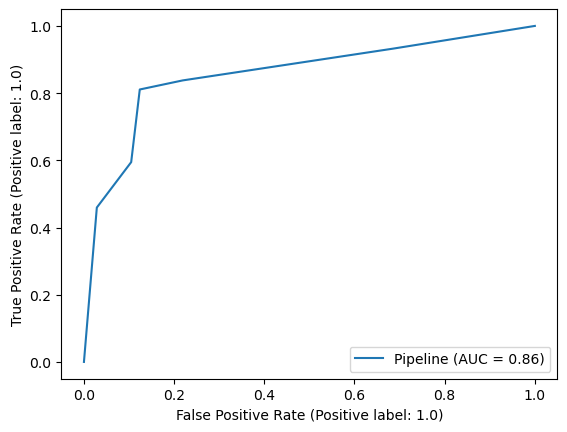

In [112]:
plot_roc_curve(best_model, X_test, y_test);

## Save the Best Model

In [113]:
# # Save the pipeline to a file using pickle
# with open('knn_pipeline.pkl', 'wb') as file:
#     pickle.dump(best_model, file)

# 7. Submit Predictions

In [114]:
pred_validation = best_model.predict(X_validation)

In [115]:
current_time = datetime.now()
formatted_time = current_time.strftime('%m_%d_%H_%M')
formatted_time

'12_12_19_09'

In [116]:
submit_df = pd.DataFrame({'PassengerId': df_test2['PassengerId'], 'Survived': pred_validation})
submit_df['Survived']  = submit_df['Survived'].astype(int)
filepath = 'data/' + formatted_time + '.csv'

In [117]:
# submit_df.to_csv(filepath, index=False)

In [118]:
submit_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [119]:
end_time = time.time()
execution_time = end_time - start_time
minutes, seconds = divmod(execution_time, 60)
print(f"Total Execution Time: {int(minutes)} minutes and {seconds:.2f} seconds")

Total Execution Time: 1 minutes and 54.35 seconds
